In [72]:
import torch

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils.AudioRead import AudioRead

from transforms.AutoencoderTransforms import AutoencoderTransforms
from transforms.MelSpectrogram import MelspectrogramStretch

In [73]:
df = pd.read_csv("resources/metadata/audio.csv")

In [74]:
audioRead = AudioRead()

trsfm = AutoencoderTransforms({"channels": "avg"})

spec = MelspectrogramStretch(hop_length=None,
            num_mels=128,
            fft_length=2048,
            norm='db')

In [75]:
tensor, sr = trsfm.apply(audioRead.sound_file(f"resources/audio/{row.fold}/{row[0]}"))
label, classID = row[8], row[6]

In [87]:
xt = tensor.unsqueeze(0).float().transpose(1,2)
x, lengths = spec(xt, torch.LongTensor(0))

In [88]:
def plot_img(x):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.imshow(x.squeeze(0).squeeze(0), cmap='magma', interpolation='nearest')

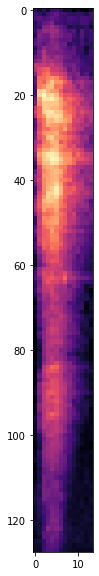

In [89]:
plot_img(x)